<a href="https://colab.research.google.com/github/matthewpecsok/bootcamp/blob/main/marketing_and_data_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MADA Python and Data Analytics Hands-On Tutorial

This notebook is intended to showcase Python's strength and versatility when dealing with data.

Presented at the MADA (Marketing and Data Analytics meeting on 1/29/2024 Professor Matthew Pecsok)

## Intro to Data Analytics in Marketing



> Marketing impact can be challenging to measure. The good news is that we are collecting more data than ever to help us evaluate the quality of marketing campaigns and learn more about our customer behavior.

> Historically, Microsoft Excel (or Google Sheets) has been a valuable tool to evaluate data on an ad-hoc basis. The challenge with Excel and Sheets is to make those analysis reproducable and efficient. In Excel each analysis tends to be a one-off, rather than reusable.

For example, let's say we are getting marketing data each week and we'd like to count the number of customers in various groups. In Excel this would require opening the CSV (comma separated values) file and making a pivot table. Each week we'd need to repeat this process.

Using Python, we can write testable code (meaning we can build in checks that the code does what we expect), which reads in the file and performs the same operation each week.

Additionally, with Python we can build much more complex tools to analyze data such as explanatory models, predictive models, or enrich data (think of computing distances between geocoded addresses).

In [1]:
import pandas as pd

## Pandas

> We'll  use the Pandas package which adds additionally functionality onto the base Python language. We use import to import the package and give it the local name pd (abbreviation for pandas).

*pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.*

## data generation (hidden)

In [2]:
import numpy as np

# Seed for reproducibility
np.random.seed(0)

# Sample size
n = 500

# Generate random data
data = {
    'CustomerID': np.arange(1, n + 1),
    'Age': np.random.randint(18, 70, size=n),
    'Gender': np.random.choice(['Male', 'Female', 'Non-Binary'], size=n, p=[.3,.6,.1]),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], size=n, p=[.3,.2,.1,.4]),
    'Income': np.random.randint(20000, 120000, size=n),
    'Marital_Status': np.random.choice(['Single', 'Married', 'Divorced', 'Widowed'], size=n),
    'Has_Children': np.random.choice([0, 1], size=n),  # 0 for No, 1 for Yes
    'Education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], size=n),
    'Employment_Status': np.random.choice(['Employed', 'Unemployed', 'Self-Employed', 'Student', 'Retired'], size=n),
    'Purchase_Frequency': np.random.choice(['Regular', 'Occasional', 'Rare', 'Never'], size=n)
}

# Create DataFrame
marketing_df = pd.DataFrame(data)

marketing_df.to_csv('marketing_data_01_01_2024.csv', index=False)


## explore the dataset

In [3]:
marketing_df = pd.read_csv('marketing_data_01_01_2024.csv')

In [4]:
marketing_df.head(3)  # Display the first few rows of the dataframe

,CustomerID,Age,Gender,Region,Income,Marital_Status,Has_Children,Education,Employment_Status,Purchase_Frequency
0,1,62,Female,South,25479,Married,0,Master,Unemployed,Rare
1,2,65,Non-Binary,West,25674,Married,0,High School,Student,Occasional
2,3,18,Male,West,81230,Married,1,PhD,Retired,Rare


What is a DataFrame?

A set of columns, each column has a specific datatype.

Examples: Age 30,23,15,10 or Education "High School PhD" etc.

Excel has not issues with mixing numeric and categorical data in a column. It allows you to do this. Pandas makes mixing data more difficult and enforces rules on columns to ensure compatability.

int64 = Integer column

object = String/Categorical/Nominal Column

In [5]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          500 non-null    int64 
 1   Age                 500 non-null    int64 
 2   Gender              500 non-null    object
 3   Region              500 non-null    object
 4   Income              500 non-null    int64 
 5   Marital_Status      500 non-null    object
 6   Has_Children        500 non-null    int64 
 7   Education           500 non-null    object
 8   Employment_Status   500 non-null    object
 9   Purchase_Frequency  500 non-null    object
dtypes: int64(4), object(6)
memory usage: 39.2+ KB


In [6]:
marketing_df['Region'].value_counts()  # Count the number of customers in each region

West     208
North    154
South     98
East      40
Name: Region, dtype: int64

In [7]:
marketing_df['Region'].value_counts(normalize=True)  # Count the number of customers in each region

West     0.416
North    0.308
South    0.196
East     0.080
Name: Region, dtype: float64

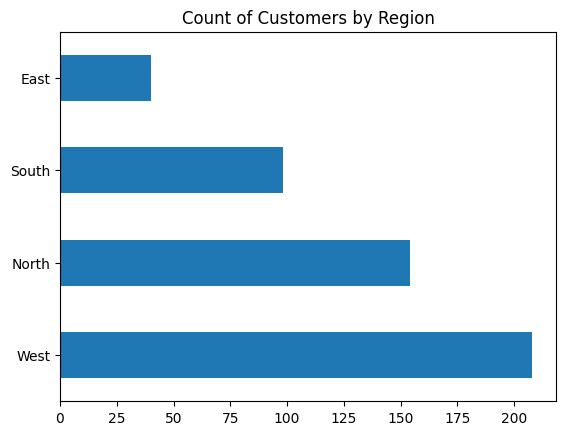

In [8]:
marketing_df.Region.value_counts().plot(kind='barh',title='Count of Customers by Region'); # ; suppresses output, not always needed

## You do

Write code that computes a table of Gender with counts, another table with proportions and finally a graph of either count or proportions.  

counts

proportions

graph

## Numeric Columns

the describe function computes 7 commmon descriptive statistics for a numeric column.



In [9]:
marketing_df.Income.describe()

count       500.000000
mean      68115.250000
std       28869.075407
min       20359.000000
25%       42902.250000
50%       67293.000000
75%       92325.750000
max      119781.000000
Name: Income, dtype: float64

A histogram can be generated to show the distribution of Income.

<Axes: >

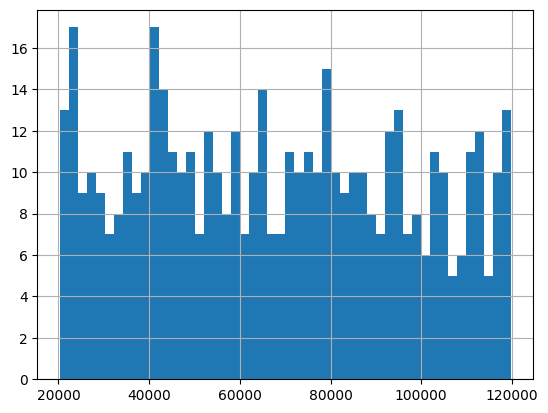

In [10]:
marketing_df.Income.hist(bins=50)

We can also use a group by and then describe to compute the descriptive statistics for each group.

In [11]:
marketing_df.Income.groupby(marketing_df.Region).describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East,40.0,68729.300000,29292.933910,20947.0,42441.75,77422.5,89620.75,119304.0
North,154.0,70891.506494,28245.572587,20359.0,47816.50,69976.0,94961.75,119704.0
South,98.0,66395.428571,29099.284343,20511.0,40466.00,64942.0,92812.00,116031.0
West,208.0,66751.966346,29186.478213,20603.0,40863.00,65096.5,90487.25,119781.0


## You try

Compute common outputs (the same as we did for Income) for the Age column.

describe

histogram

grouped by describe

## Adding and removing columns.

It's quite easy to add and remove columns with Pandas.

Suppose we want a boolean (True False) column that says if the person is employed or not.

First, let's create a copy of the dataframe so we don't impact the original.

In [12]:
mktg_updated_df = marketing_df.copy()

Here we create a boolean result for each row that contains True if the customer is employed and False if they are not.

In [13]:
mktg_updated_df.Employment_Status == 'Employed'

0      False
1      False
2      False
3      False
4      False
       ...  
495     True
496     True
497     True
498    False
499    False
Name: Employment_Status, Length: 500, dtype: bool

In [14]:
mktg_updated_df['Employed'] = mktg_updated_df.Employment_Status == 'Employed'

In [15]:
mktg_updated_df.Employed.value_counts()

False    391
True     109
Name: Employed, dtype: int64

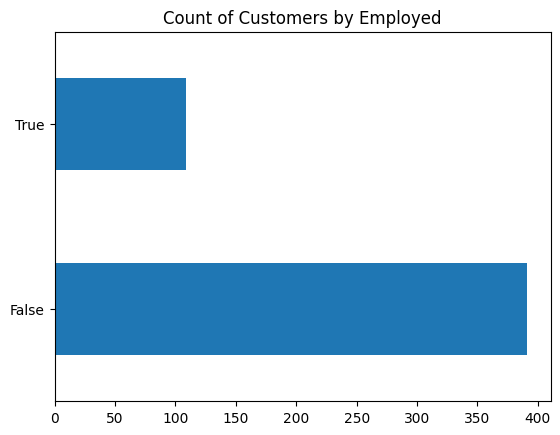

In [16]:
mktg_updated_df.Employed.value_counts().plot(kind='barh',title='Count of Customers by Employed');

## exporting your updated CSV

In [17]:
mktg_updated_df.to_csv('marketing_data_01_01_2024_updated.csv', index=False)

## creating multiple files by group region

The power of repitition in code:

Suppose you wanted a salesperson to follow up with their region and needed to make a csv file for them.

a for loop allows you to execute a block of code for each item in some iterable list.

In this example we will generate 4 export files



In [59]:
for fruit in ['apple', 'banana', 'orange', 'pear']:
  print(f'we are on fruit: {fruit}')

we are on fruit: apple
we are on fruit: banana
we are on fruit: orange
we are on fruit: pear


In [18]:
for region in marketing_df['Region'].unique(): # loop over all regions, the code below will execute for each region
  print(f'we are on region: {region}')
  region_df = marketing_df[marketing_df['Region'] == region] # subset the dataframe for the name of the region we are on
  region_df.to_csv(f'marketing_data_01_01_2024_updated_{region}.csv', index=False) # create a region specific export file.


we are on region: South
we are on region: West
we are on region: North
we are on region: East


## Sqlite Database

One of the beautiful things about Python is how easy it is to not use Python if you prefer something else. Take for example SQL. If you'd prefer to just use sql, you could load your dataframe into a sqlite database and query it rather than a dataframe operation in pandas.

In [47]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('marketing_data.db')

# Create a cursor object
cur = conn.cursor()

# Create the table
cur.execute('''CREATE TABLE marketing_data (
    CustomerID INTEGER PRIMARY KEY,
    Age INTEGER,
    Gender TEXT,
    Region TEXT,
    Income INTEGER,
    Marital_Status TEXT,
    Has_Children INTEGER,
    Education TEXT,
    Employment_Status TEXT,
    Purchase_Frequency TEXT
)''')

# Insert the data into the table
cur.executemany('''INSERT INTO marketing_data (CustomerID, Age, Gender, Region, Income, Marital_Status, Has_Children, Education, Employment_Status, Purchase_Frequency)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)''', marketing_df.values.tolist())

# Commit the changes to the database
conn.commit()




In [48]:
%load_ext sql

In [50]:
%sql sqlite:///marketing_data.db

In [52]:
# Query the database
%%sql
SELECT Region, COUNT(*) AS count
FROM marketing_data
GROUP BY Region;

 * sqlite:///marketing_data.db
Done.


Region,count
East,40
North,154
South,98
West,208


try the same thing with Employment_Status

In [58]:
%%sql
SELECT XXXXXX, COUNT(*) AS count
FROM marketing_data
GROUP BY XXXXXX
order by count(*) desc;

 * sqlite:///marketing_data.db
(sqlite3.OperationalError) no such column: XXXXXX
[SQL: SELECT XXXXXX, COUNT(*) AS count
FROM marketing_data
GROUP BY XXXXXX
order by count(*) desc;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


# California Housing Data

Popular dataset for Machine Learning and Data Analysis. Used to explore housing price predictions.

To learn more about numeric predictions consider taking a class that discusses predictive modeling (like IS4482 or IS6482)

In [19]:
# prompt: import "/content/sample_data/california_housing_train.csv" and build and train a decision tree with sklearn

import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# Read the data from the CSV file
train_data = pd.read_csv("/content/sample_data/california_housing_train.csv")
test_data = pd.read_csv("/content/sample_data/california_housing_test.csv")





In [20]:
train_data.head(6)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0


## plot the california housing data

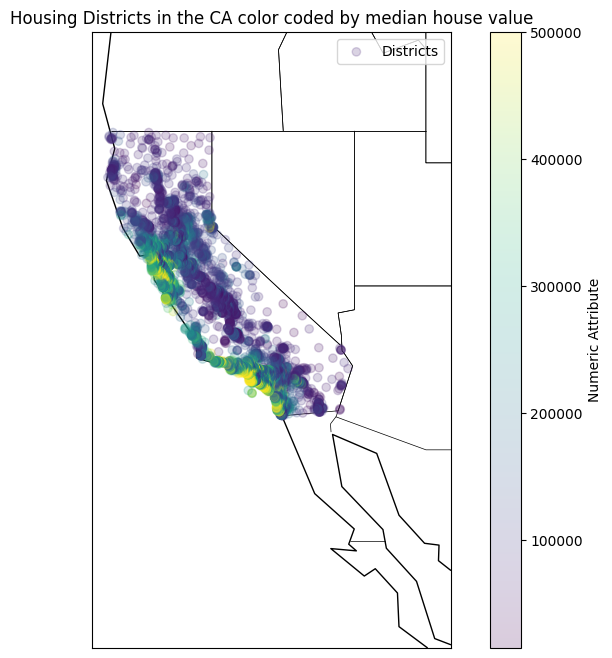

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Create a figure and axes
plt.figure(figsize=(10, 8))
map = Basemap(llcrnrlon=-125, llcrnrlat=24, urcrnrlon=-110, urcrnrlat=45, projection='merc')

# Draw coastlines, countries, and states
map.drawcoastlines()
map.drawcountries()
map.drawstates()

cmap = plt.get_cmap('viridis')

# Your latitude and longitude data (example data)
lats = train_data['latitude']  # Los Angeles, New York City, and Los Angeles
lons = train_data['longitude']

# Convert latitude and longitude to map coordinates
x, y = map(lons, lats)

# Plot the points on the map
sc = map.scatter(x, y, marker='o', label='Districts', zorder=5,c=train_data['median_house_value'], cmap=cmap,alpha=0.2)

cbar = plt.colorbar(sc, orientation='vertical', label='Numeric Attribute')


# Add a title and legend
plt.title('Housing Districts in the CA color coded by median house value')
plt.legend()

# Show the map
plt.show()


### Regression Tree Model

In [24]:
regression_data = train_data.copy()

In [25]:
# Separate the features and target variable
features = regression_data.drop("median_house_value", axis=1)
target = regression_data["median_house_value"]

# Create a decision tree regressor
model = DecisionTreeRegressor(min_samples_leaf=4)

# Train the model on the data
model.fit(features, target)

DecisionTreeRegressor(min_samples_leaf=4)

In [26]:
predictions = model.predict(features)

### Train MAE

In [27]:
# prompt: generate MAE for the predictions

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(target, predictions)
print("Mean absolute error:", mae)


Mean absolute error: 19342.53779971989


### Test MAE

In [30]:
test_features = test_data.drop("median_house_value", axis=1)
test_target = test_data["median_house_value"]

test_predictions = model.predict(test_features)
test_mae = mean_absolute_error(test_target, test_predictions)

test_residuals = test_target - test_predictions

print("Mean absolute error:", test_mae)


Mean absolute error: 41028.957726984125


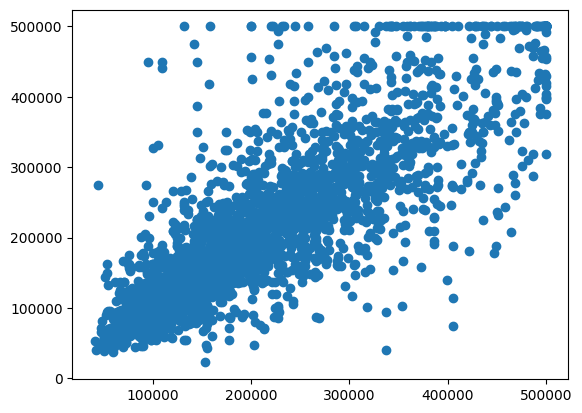

In [42]:
plt.scatter(test_predictions,test_target);